# Generative Adversarial Networks

<img src="GAN.JPG">

## Download MNIST and load it

In [1]:
# import os
# import random
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# %matplotlib inline

# import sys
# import shutil
# from six.moves import urllib
# import gzip
# import cPickle
# import imageio


# SOURCE_URL = 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
# FILENAME = SOURCE_URL.split('/')[-1]
# DATA_DIR = './datasets'


# def img_tile(imgs, aspect_ratio=1.0, tile_shape=None, border=1,
#              border_color=0):
#     ''' Tile images in a grid.
#     If tile_shape is provided only as many images as specified in tile_shape
#     will be included in the output.
#     '''

#     imgs = np.array(imgs)
#     if imgs.ndim != 3 and imgs.ndim != 4:
#         raise ValueError('imgs has wrong number of dimensions.')
#     n_imgs = imgs.shape[0]

#     # Grid shape
#     img_shape = np.array(imgs.shape[1:3])
#     if tile_shape is None:
#         img_aspect_ratio = img_shape[1] / float(img_shape[0])
#         aspect_ratio *= img_aspect_ratio
#         tile_height = int(np.ceil(np.sqrt(n_imgs * aspect_ratio)))
#         tile_width = int(np.ceil(np.sqrt(n_imgs / aspect_ratio)))
#         grid_shape = np.array((tile_height, tile_width))
#     else:
#         assert len(tile_shape) == 2
#         grid_shape = np.array(tile_shape)

#     # Tile image shape
#     tile_img_shape = np.array(imgs.shape[1:])
#     tile_img_shape[:2] = (img_shape[:2] + border) * grid_shape[:2] - border

#     # Assemble tile image
#     tile_img = np.empty(tile_img_shape)
#     tile_img[:] = border_color
#     for i in range(grid_shape[0]):
#         for j in range(grid_shape[1]):
#             img_idx = j + i * grid_shape[1]
#             if img_idx >= n_imgs:
#                 # No more images - stop filling out the grid.
#                 break
#             img = imgs[img_idx]
#             yoff = (img_shape[0] + border) * i
#             xoff = (img_shape[1] + border) * j
#             tile_img[yoff:yoff + img_shape[0], xoff:xoff + img_shape[1], ...] = img

#     return tile_img


# def maybe_download(data_dir):
#     filepath = os.path.join(data_dir, FILENAME)
#     if not os.path.exists(data_dir):
#         os.makedirs(data_dir)
#     if not os.path.isfile(filepath):
#         def _progress(count, block_size, total_size):
#             sys.stdout.write('\r>> Downloading {} {:.1f} %'.format(
#                 FILENAME, float(count * block_size) / float(total_size) * 100.0))
#             sys.stdout.flush()
#         filepath, _ = urllib.request.urlretrieve(SOURCE_URL, filepath, _progress)
#         print()
#         statinfo = os.stat(filepath)
#         print('Successfully donloaded', FILENAME, statinfo.st_size, 'bytes.')


# def load(data_dir, subset='train'):
#     maybe_download(data_dir)
#     filepath = os.path.join(data_dir, FILENAME)

#     f = gzip.open(filepath, 'rb')
#     train_set, valid_set, test_set = cPickle.load(f)
#     f.close()

#     if subset == 'train':
#         trainx, trainy = train_set
#         trainx = trainx.astype(np.float32).reshape(trainx.shape[0], 28, 28)
#         trainy = trainy.astype(np.uint8)
#         return trainx, trainy
#     elif subset == 'test':
#         testx, testy = test_set
#         testx = testx.astype(np.float32).reshape(testx.shape[0], 28, 28)
#         testy = testy.astype(np.uint8)
#         return testx, testy
#     elif subset == 'valid':
#         validx, validy = valid_set
#         validx = validx.astype(np.float32).reshape(validx.shape[0], 28, 28)
#         validy = validy.astype(np.uint8)
#         return validx, validy
#     else:
#         raise NotImplementedError('subset should be train or valid or test')

# # Load data
# train_data, train_label = load(DATA_DIR, 'train')
# valid_data, valid_label = load(DATA_DIR, 'valid')
# test_data, test_label = load(DATA_DIR, 'test')

# # concatenate train and valid data as train data
# train_data = np.concatenate((train_data, valid_data))
# train_label = np.concatenate((train_label, valid_label))

In [2]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import shutil

from keras.datasets import mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()
train_data = train_data / 255.
test_data = test_data / 255.

def img_tile(imgs, aspect_ratio=1.0, tile_shape=None, border=1,
             border_color=0):
    ''' Tile images in a grid.
    If tile_shape is provided only as many images as specified in tile_shape
    will be included in the output.
    '''
    imgs = np.array(imgs)
    if imgs.ndim != 3 and imgs.ndim != 4:
        raise ValueError('imgs has wrong number of dimensions.')
    n_imgs = imgs.shape[0]

    # Grid shape
    img_shape = np.array(imgs.shape[1:3])
    if tile_shape is None:
        img_aspect_ratio = img_shape[1] / float(img_shape[0])
        aspect_ratio *= img_aspect_ratio
        tile_height = int(np.ceil(np.sqrt(n_imgs * aspect_ratio)))
        tile_width = int(np.ceil(np.sqrt(n_imgs / aspect_ratio)))
        grid_shape = np.array((tile_height, tile_width))
    else:
        assert len(tile_shape) == 2
        grid_shape = np.array(tile_shape)

    # Tile image shape
    tile_img_shape = np.array(imgs.shape[1:])
    tile_img_shape[:2] = (img_shape[:2] + border) * grid_shape[:2] - border

    # Assemble tile image
    tile_img = np.empty(tile_img_shape)
    tile_img[:] = border_color
    for i in range(grid_shape[0]):
        for j in range(grid_shape[1]):
            img_idx = j + i * grid_shape[1]
            if img_idx >= n_imgs:
                # No more images - stop filling out the grid.
                break
            img = imgs[img_idx]
            yoff = (img_shape[0] + border) * i
            xoff = (img_shape[1] + border) * j
            tile_img[yoff:yoff + img_shape[0], xoff:xoff + img_shape[1], ...] = img

    return tile_img


def plot_network_output(data, reconst_data, generated, step):
    num = 8
    
    fig, ax = plt.subplots(nrows=3, ncols=num, figsize=(18, 6))
    for i in xrange(num):
        ax[(0, i)].imshow(np.squeeze(generated[i]), cmap=plt.cm.gray)
        ax[(1, i)].imshow(np.squeeze(data[i]), cmap=plt.cm.gray)
        ax[(2, i)].imshow(np.squeeze(reconst_data[i]), cmap=plt.cm.gray)
        ax[(0, i)].axis('off')
        ax[(1, i)].axis('off')
        ax[(2, i)].axis('off')

    fig.suptitle('Top: generated | Middle: data | Bottom: recunstructed')
#     plt.show()
    plt.savefig(IMAGE_DIR + '/{}.png'.format(str(step).zfill(6)))
    plt.close()

Using TensorFlow backend.


## show MNIST

In [3]:
# size of MNIST
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


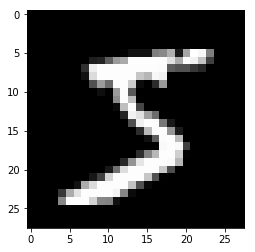

In [4]:
plt.imshow(train_data[0], 'gray')

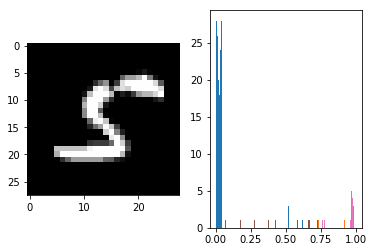

In [5]:
# show data
idx = np.random.randint(0, train_data.shape[0])
_, (ax1, ax2) = plt.subplots(1, 2)
sample_data = train_data[idx]
# ax1.imshow(sample_data, cmap=plt.cm.Greys);
ax1.imshow(np.array(sample_data*255, dtype=np.uint8), 'gray')
ax2.hist(sample_data, bins=20, range=[0, 1]);

## Delete summary folder and make it

In [6]:
SUMMARY_DIR = './gan_summary'
TRAIN_DIR = SUMMARY_DIR + '/train'
TEST_DIR = SUMMARY_DIR + '/test'
IMAGE_DIR = SUMMARY_DIR + '/image'

if os.path.exists(SUMMARY_DIR):
    shutil.rmtree(SUMMARY_DIR)
if not os.path.exists(SUMMARY_DIR):
    os.makedirs(SUMMARY_DIR)
    os.makedirs(TRAIN_DIR)
    os.makedirs(TEST_DIR)
    os.makedirs(IMAGE_DIR)

## Define tensorflow graph

In [7]:
def fully_connected(inputs, out_channel, name='fc'):
    """
    very simple fully connected layer function

    Args:
        inputs: a batch of input tensor [batch_size, n]
                where n is the number of input feature dimension
        out_channel: output channel dimension

    Returns:
        fc: inputs * weights + biases [batch_size, out_channel]
    """
    # in_channel: input channel dimension
    # w_shape: shape of weight matrix
    # b_shape: shape of bias vector
    in_channel = inputs.get_shape().as_list()[1]
    w_shape = [in_channel, out_channel]
    b_shape = [out_channel]

    # Define weight matrix variable, bias vector variable
    with tf.variable_scope(name):
        # To share the variables you have to use
        # a function 'tf.get_variable' instead of 'tf.Variable'
        weights = tf.get_variable('weights', shape=w_shape,
                                  initializer=tf.truncated_normal_initializer(stddev=0.02))
        biases = tf.get_variable('biases', shape=b_shape,
                                 initializer=tf.constant_initializer(0.0))

        fc = tf.matmul(inputs, weights)
        fc = tf.nn.bias_add(fc, biases)

        return fc


def discriminator(x, reuse=None):
    """
    build the discriminator

    Args:
        x: a batch of input to the network [batch_size, 28, 28, 1]

    returns:
        net: output of the discriminator [batch_size, 1]
    """
    with tf.variable_scope('discriminator') as scope:
        if reuse:
            scope.reuse_variables()

        # Vectorize the input x
        # Fully connected layer with 256 output units and 'fc1' as its name
        # Apply non-linearity function 'relu'
        # Fully connected layer with 1 output units and 'fc2' as its name
        # Apply non-linearity function 'sigmoid'
        # Return the final tensor
        net = tf.reshape(x, [x.get_shape().as_list()[0], -1])
        net = fully_connected(net, 256, name='fc1')
        net = tf.nn.relu(net)
        net = fully_connected(net, 1, name='fc2')
        net = tf.nn.sigmoid(net)
        return net


def generator(z):
    """
    build the generator

    Args:
        z: a batch of input to the network [batch_size, z_dim]

    Returns:
        net: output of the generator [batch_size, 28, 28, 1]
    """
    with tf.variable_scope('generator') as scope:

        # Unlike the discriminator, input z is a set of vectors
        
        # Fully connected layer with 256 output units and 'fc1' as its name
        # Apply non-linearity function 'relu'
        # Fully connected layer with 784 output units and 'fc2' as its name
        # Apply non-linearity function 'sigmoid'
        # Reshape final output to be a proper image file [28, 28, 1]
        # Return the final tensor
        net = fully_connected(z, 256, name='fc1')
        net = tf.nn.relu(net)
        net = fully_connected(net, 784, name='fc2')
        net = tf.nn.sigmoid(net)
        net = tf.reshape(net, [z.get_shape().as_list()[0], 28, 28, 1])
        return net


def get_loss(D_real, D_fake, eps=1e-10):
    """
    get loss of GAN

    Args:
        D_real: Real Discriminator output [batch_size, 1]
        D_rake: Fake discriminator output [batch_size, 1]

    Returns:
        D_loss: Discriminator loss
        G_loss: Generator loss
    """
    D_loss = -(tf.reduce_mean(tf.log(D_real + eps)) + tf.reduce_mean(tf.log(1 - D_fake + eps)))
    G_loss = -tf.reduce_mean(tf.log(D_fake + eps))

    return D_loss, G_loss


def get_next_batch(data, label, batch_size):
    """
    get 'batch_size' amount of data and label randomly

    Args:
        data: data
        label: label
        batch_size: # of data to get

    Returns:
        batch_data: data of 'batch_size'
        batch_label: coresponding label of batch_data
    """
    n_data = data.shape[0]
    random_idx = random.sample(range(1, n_data), batch_size)

    batch_data = data[random_idx]
    batch_label = label[random_idx]
    return batch_data, batch_label


# Set hyperparameters
batch_size = 100
z_dim = 128
max_step = 20000
lr = 0.001
beta1 = 0.9

train_data = np.expand_dims(train_data, 3)
test_data = np.expand_dims(test_data, 3)

############################# Build the model #############################
# Define image tensor x placeholder
x = tf.placeholder(tf.float32, [batch_size, 28, 28, 1], name='input_x')
# Define z vector as uniform distribution between [-1, 1]
z = tf.random_uniform((batch_size, z_dim), -1., 1., name='latent_z')

# Build discriminator where input data is real image x
D_real = discriminator(x, reuse=False)
# Build generator
G = generator(z)
# Build discriminator where input data is generated image G
D_fake = discriminator(G, reuse=True)

# Get D_loss and G_loss
D_loss, G_loss = get_loss(D_real, D_fake)

# Make optimization op
opt = tf.train.AdamOptimizer(lr, beta1=beta1)

# To update the generator and the discriminator
# get their network parameters
G_params = [param for param in tf.trainable_variables()
            if 'generator' in param.name]
D_params = [param for param in tf.trainable_variables()
            if 'discriminator' in param.name]

# Make train op for each network
D_train = opt.minimize(D_loss, var_list=D_params)
G_train = opt.minimize(G_loss, var_list=G_params)

# Make initialization op
init = tf.global_variables_initializer()

# Add summary and make op to add summary data to event log
tf.summary.scalar('Generator_loss', G_loss)
tf.summary.scalar('Discriminator_loss', D_loss)
merged = tf.summary.merge_all()

## Train GAN

Training data


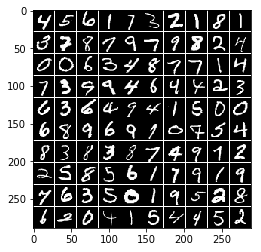

0 steps |  G_loss: 0.9343, D_loss: 1.4116


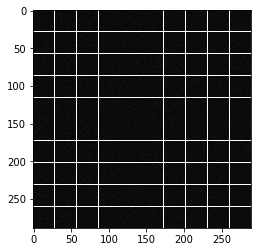

200 steps |  G_loss: 6.0541, D_loss: 0.0237


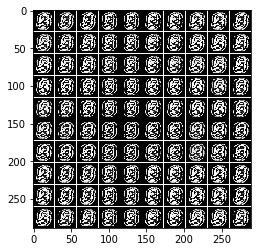

400 steps |  G_loss: 6.0708, D_loss: 0.0095


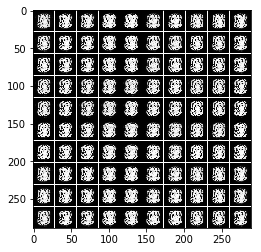

600 steps |  G_loss: 10.5605, D_loss: 0.0433


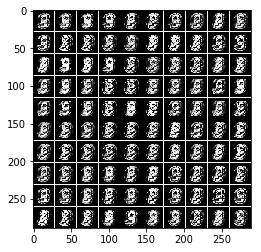

800 steps |  G_loss: 6.6678, D_loss: 0.0281


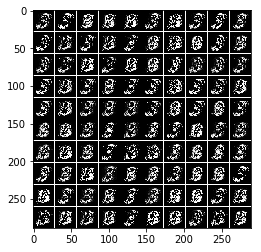

1000 steps |  G_loss: 8.0841, D_loss: 0.0442


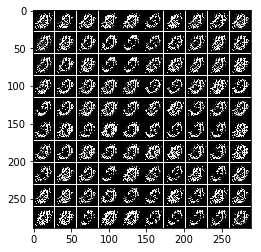

1200 steps |  G_loss: 7.2148, D_loss: 0.0277


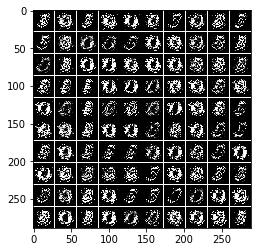

1400 steps |  G_loss: 6.0127, D_loss: 0.0252


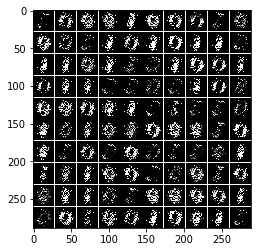

1600 steps |  G_loss: 6.2808, D_loss: 0.0168


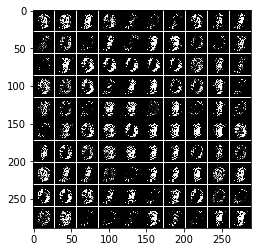

1800 steps |  G_loss: 5.9691, D_loss: 0.0110


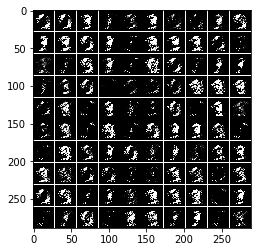

2000 steps |  G_loss: 7.0632, D_loss: 0.0218


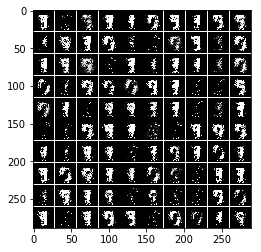

2200 steps |  G_loss: 5.1369, D_loss: 0.0492


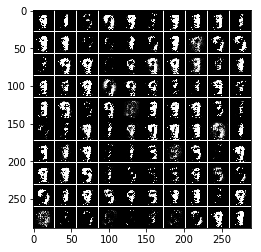

2400 steps |  G_loss: 5.9624, D_loss: 0.1152


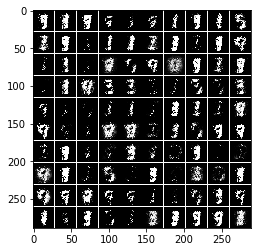

2600 steps |  G_loss: 5.0731, D_loss: 0.0822


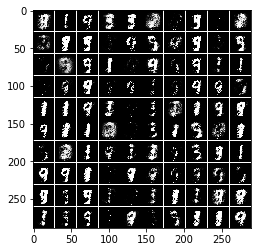

2800 steps |  G_loss: 5.6486, D_loss: 0.0656


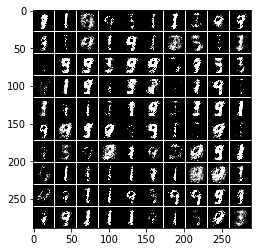

3000 steps |  G_loss: 5.6053, D_loss: 0.0457


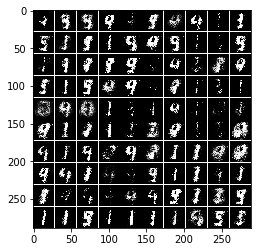

3200 steps |  G_loss: 5.7113, D_loss: 0.0830


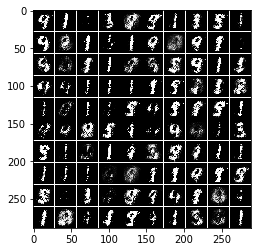

3400 steps |  G_loss: 6.7989, D_loss: 0.0776


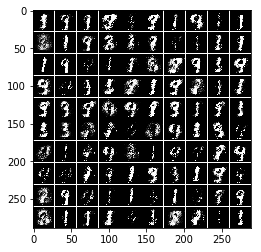

3600 steps |  G_loss: 5.9022, D_loss: 0.1658


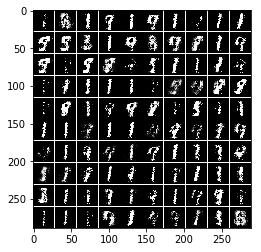

3800 steps |  G_loss: 5.7487, D_loss: 0.0804


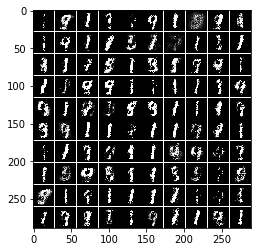

4000 steps |  G_loss: 4.9035, D_loss: 0.0747


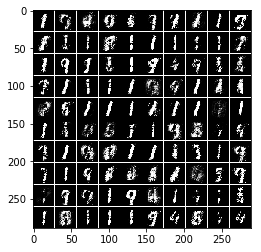

4200 steps |  G_loss: 3.8988, D_loss: 0.2323


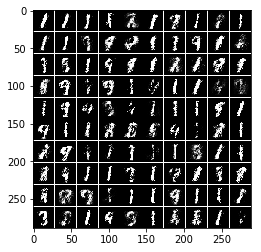

4400 steps |  G_loss: 4.3972, D_loss: 0.2388


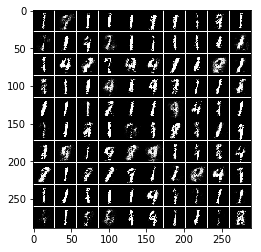

4600 steps |  G_loss: 5.5163, D_loss: 0.1675


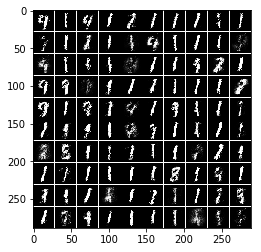

4800 steps |  G_loss: 4.3152, D_loss: 0.2336


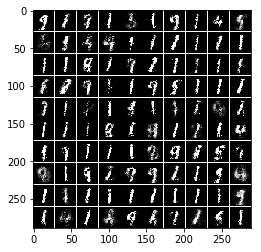

5000 steps |  G_loss: 4.0856, D_loss: 0.1821


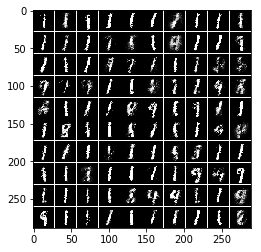

5200 steps |  G_loss: 4.7614, D_loss: 0.2843


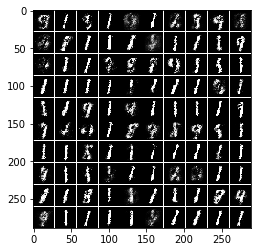

5400 steps |  G_loss: 4.7558, D_loss: 0.2342


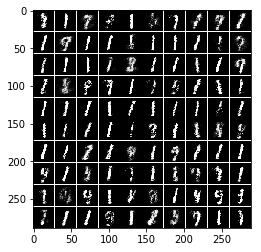

5600 steps |  G_loss: 3.6736, D_loss: 0.2256


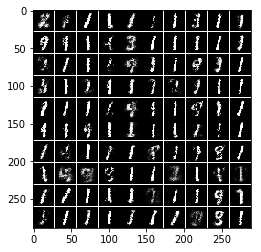

5800 steps |  G_loss: 3.0961, D_loss: 0.3638


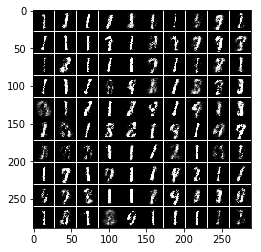

6000 steps |  G_loss: 4.0709, D_loss: 0.3189


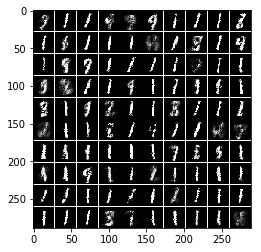

6200 steps |  G_loss: 4.2974, D_loss: 0.2067


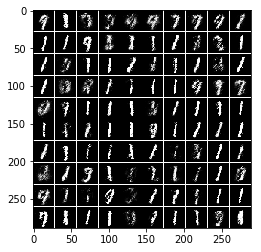

6400 steps |  G_loss: 4.7343, D_loss: 0.3840


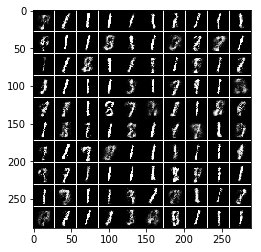

6600 steps |  G_loss: 3.6453, D_loss: 0.3073


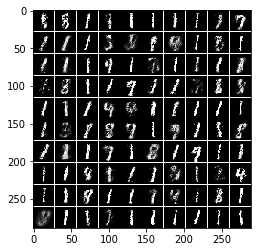

6800 steps |  G_loss: 4.5670, D_loss: 0.1935


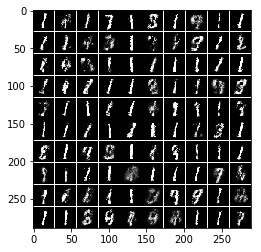

7000 steps |  G_loss: 3.7432, D_loss: 0.4058


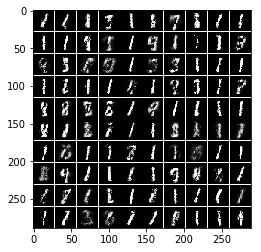

7200 steps |  G_loss: 4.1174, D_loss: 0.2127


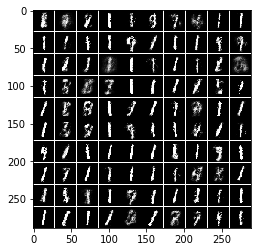

7400 steps |  G_loss: 4.0339, D_loss: 0.2959


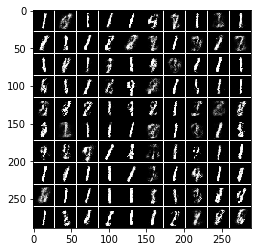

7600 steps |  G_loss: 3.4817, D_loss: 0.3508


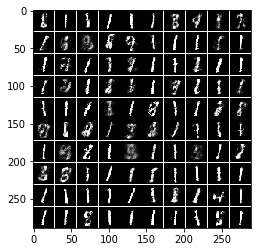

7800 steps |  G_loss: 3.0948, D_loss: 0.3371


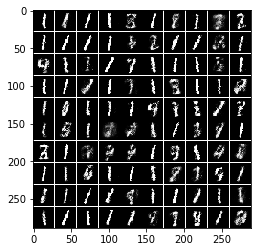

8000 steps |  G_loss: 4.2767, D_loss: 0.4080


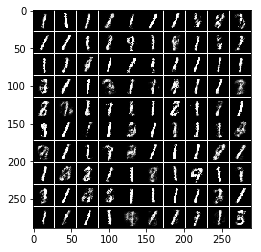

8200 steps |  G_loss: 3.0907, D_loss: 0.4093


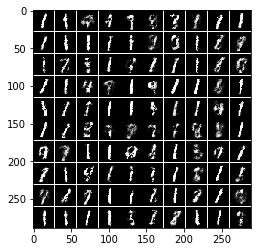

8400 steps |  G_loss: 3.8645, D_loss: 0.4152


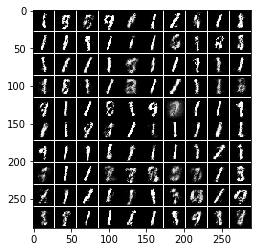

8600 steps |  G_loss: 3.0868, D_loss: 0.5425


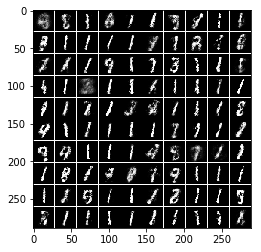

8800 steps |  G_loss: 3.5608, D_loss: 0.6837


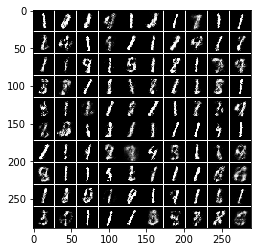

9000 steps |  G_loss: 3.0203, D_loss: 0.4459


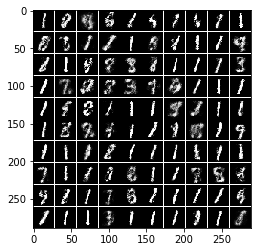

9200 steps |  G_loss: 4.1396, D_loss: 0.2434


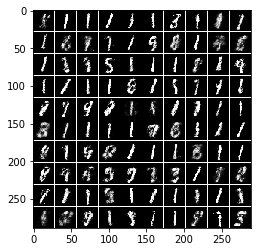

9400 steps |  G_loss: 3.8077, D_loss: 0.5219


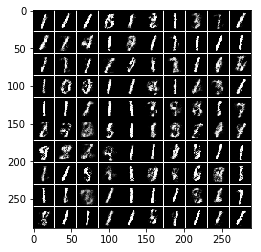

9600 steps |  G_loss: 3.4270, D_loss: 0.5614


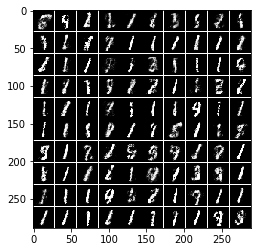

9800 steps |  G_loss: 2.3219, D_loss: 0.4960


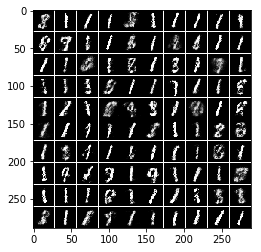

10000 steps |  G_loss: 2.8295, D_loss: 0.3166


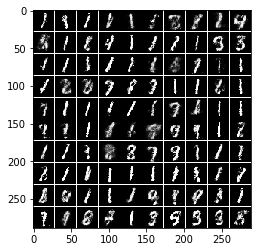

10200 steps |  G_loss: 3.3529, D_loss: 0.4197


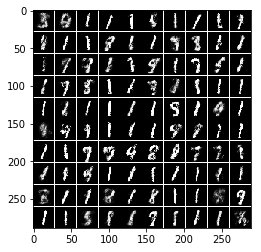

10400 steps |  G_loss: 2.9835, D_loss: 0.6508


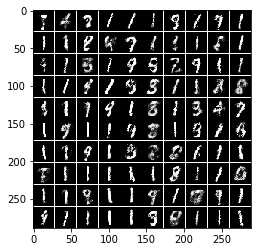

10600 steps |  G_loss: 3.3761, D_loss: 0.4910


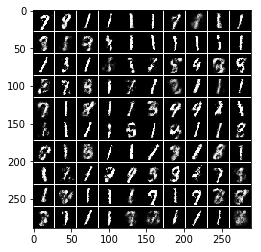

10800 steps |  G_loss: 3.1680, D_loss: 0.4867


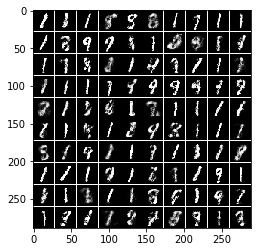

11000 steps |  G_loss: 3.5147, D_loss: 0.6188


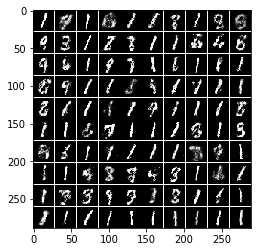

11200 steps |  G_loss: 2.7616, D_loss: 0.4962


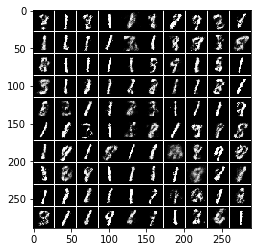

11400 steps |  G_loss: 3.2236, D_loss: 0.4592


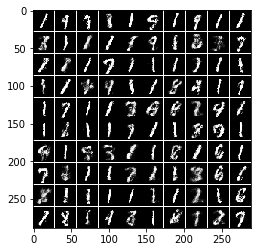

11600 steps |  G_loss: 2.9053, D_loss: 0.5761


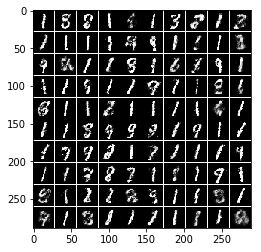

11800 steps |  G_loss: 3.1514, D_loss: 0.4708


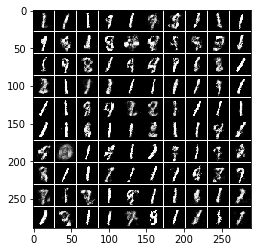

12000 steps |  G_loss: 3.1740, D_loss: 0.5868


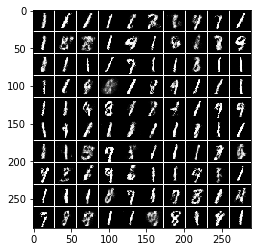

12200 steps |  G_loss: 2.7752, D_loss: 0.5543


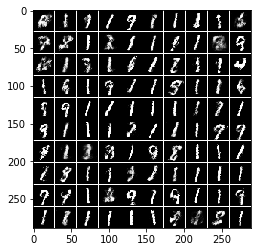

12400 steps |  G_loss: 3.5002, D_loss: 0.5367


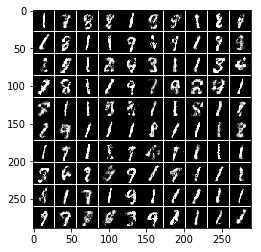

12600 steps |  G_loss: 2.7647, D_loss: 0.5923


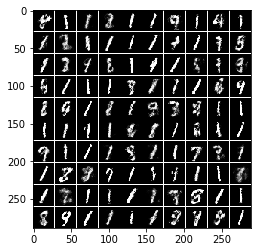

12800 steps |  G_loss: 2.5161, D_loss: 0.6725


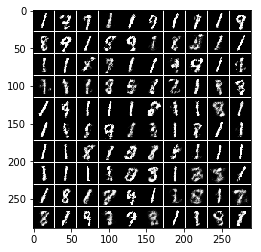

13000 steps |  G_loss: 2.4091, D_loss: 0.6016


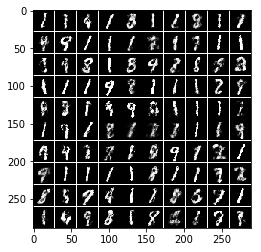

13200 steps |  G_loss: 3.2164, D_loss: 0.3888


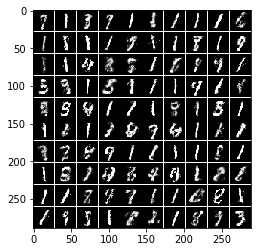

13400 steps |  G_loss: 2.7515, D_loss: 0.6783


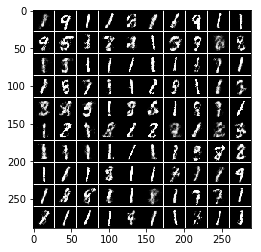

13600 steps |  G_loss: 2.4396, D_loss: 0.3606


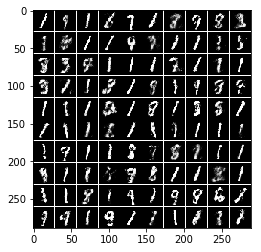

13800 steps |  G_loss: 2.7101, D_loss: 0.6454


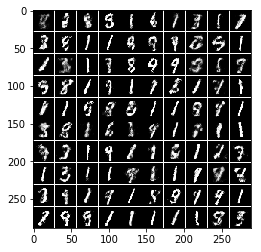

14000 steps |  G_loss: 3.0684, D_loss: 0.7173


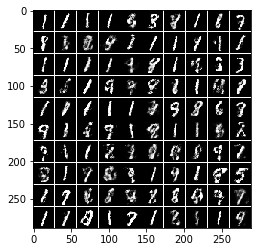

14200 steps |  G_loss: 2.4151, D_loss: 0.4157


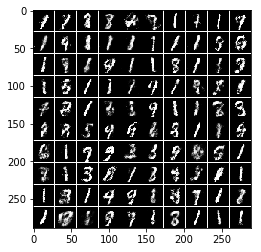

14400 steps |  G_loss: 3.4621, D_loss: 0.3932


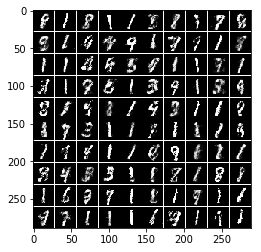

14600 steps |  G_loss: 3.2264, D_loss: 0.5635


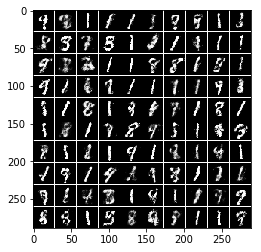

14800 steps |  G_loss: 3.2151, D_loss: 0.5211


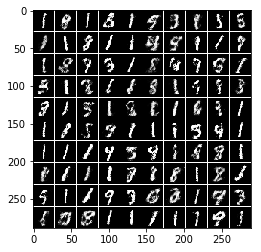

15000 steps |  G_loss: 2.7481, D_loss: 0.6022


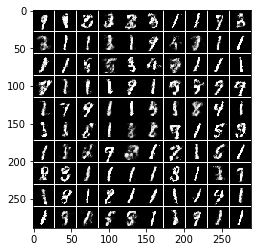

15200 steps |  G_loss: 3.1476, D_loss: 0.4833


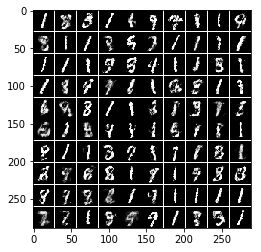

15400 steps |  G_loss: 2.8813, D_loss: 0.4698


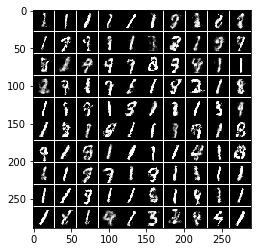

15600 steps |  G_loss: 2.7669, D_loss: 0.5648


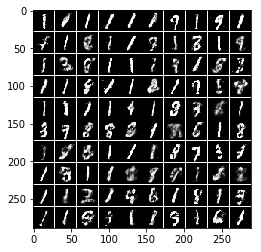

15800 steps |  G_loss: 2.3295, D_loss: 0.6863


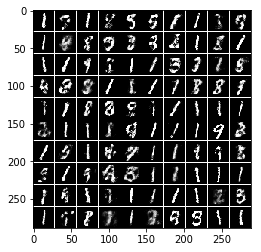

16000 steps |  G_loss: 2.4311, D_loss: 0.5844


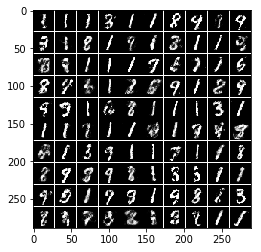

16200 steps |  G_loss: 2.6466, D_loss: 0.5580


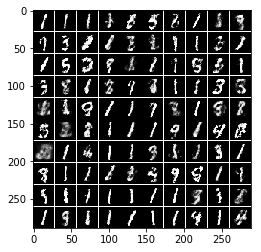

16400 steps |  G_loss: 2.4244, D_loss: 0.4969


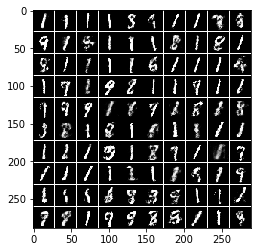

16600 steps |  G_loss: 2.3116, D_loss: 0.5968


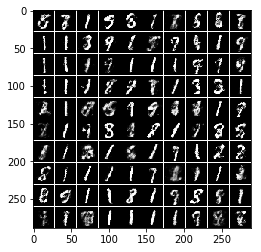

16800 steps |  G_loss: 2.9093, D_loss: 0.5330


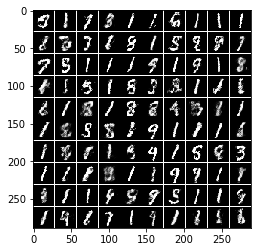

17000 steps |  G_loss: 3.0806, D_loss: 0.5044


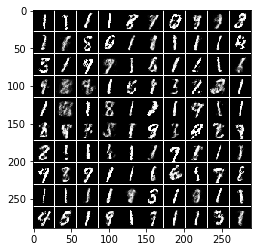

17200 steps |  G_loss: 2.5909, D_loss: 0.5765


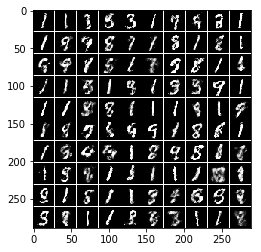

17400 steps |  G_loss: 2.9363, D_loss: 0.5370


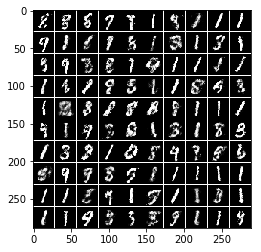

17600 steps |  G_loss: 2.6347, D_loss: 0.3875


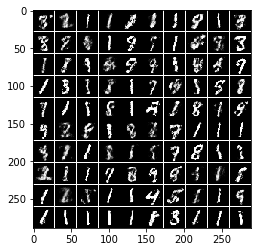

17800 steps |  G_loss: 2.5141, D_loss: 0.4835


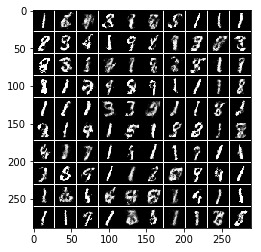

18000 steps |  G_loss: 2.6412, D_loss: 0.6341


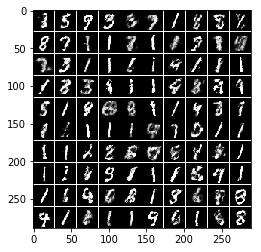

18200 steps |  G_loss: 2.8486, D_loss: 0.5053


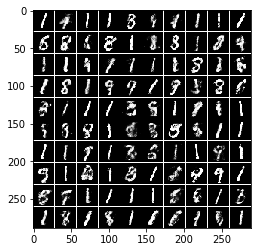

18400 steps |  G_loss: 2.2450, D_loss: 0.5831


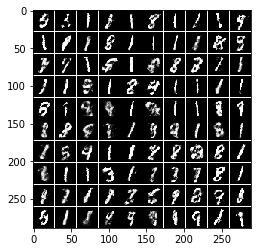

18600 steps |  G_loss: 2.3909, D_loss: 0.6356


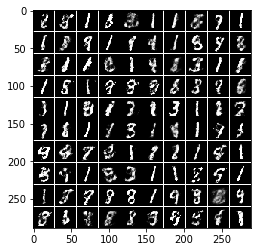

18800 steps |  G_loss: 2.3659, D_loss: 0.4838


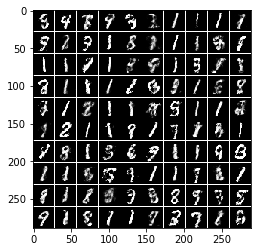

19000 steps |  G_loss: 2.5708, D_loss: 0.6098


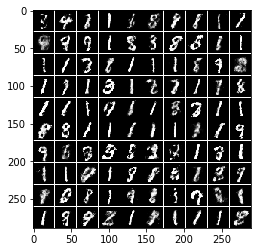

19200 steps |  G_loss: 2.7662, D_loss: 0.6692


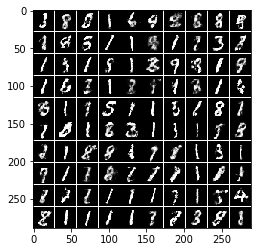

19400 steps |  G_loss: 2.6425, D_loss: 0.7409


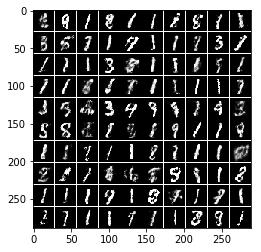

19600 steps |  G_loss: 2.3863, D_loss: 0.5817


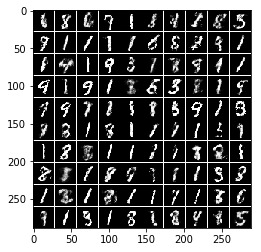

19800 steps |  G_loss: 2.5350, D_loss: 0.4516


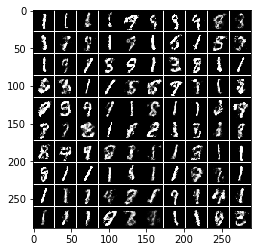

In [8]:
with tf.Session() as sess:
    # Define writer
    train_writer = tf.summary.FileWriter(TRAIN_DIR, sess.graph)
    test_writer = tf.summary.FileWriter(TEST_DIR)
    
    # Initialize variables
    sess.run(init)
    
    # Before train the model, shows train data and save it
    batch_x, batch_y = get_next_batch(train_data, train_label, batch_size)
    train_tiled = img_tile(batch_x, border_color=1.0)
    train_tiled = np.squeeze(train_tiled)
    print("Training data")
    plt.imshow(train_tiled, cmap=plt.cm.gray)
    plt.show()
    plt.imsave(IMAGE_DIR + '/train.png', train_tiled, cmap=plt.cm.gray)
    
    samples = []
    for step in range(max_step):
        batch_x, batch_y = get_next_batch(train_data, train_label, batch_size)
        
        _, d_loss = sess.run([D_train, D_loss], feed_dict={x: batch_x})
        _, g_loss = sess.run([G_train, G_loss])
        summary = sess.run(merged, feed_dict={x: batch_x})
        train_writer.add_summary(summary, step)
        
        # Save generarted data to make gif files
        if step % 50 == 0:
            g = sess.run(G)
            g_tiled = img_tile(g, border_color=1.0)
            g_tiled = np.squeeze(g_tiled)
            samples.append(g_tiled)
        if step % 200 == 0:
            print("{} steps |  G_loss: {:.4f}, D_loss: {:.4f}".format(step, g_loss, d_loss))
            plt.imshow(g_tiled, cmap=plt.cm.gray)
            plt.show()
            plt.imsave(IMAGE_DIR + '/{}.png'.format(str(step).zfill(6)),
                       g_tiled, cmap=plt.cm.gray)
#             plt.close()



In [9]:
import imageio
# Make gif files
imageio.mimsave(SUMMARY_DIR + '/generated.gif', samples)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0